# Introduction

This workbook introduces OpenCV concepts. Based on lecture material in the OpenCV Bootcamp material on opencv.org

In [1]:
# Confirm OpenCV is installed correctly

import cv2 as cv
cv.__version__

'4.9.0'

# Import libraries

In [2]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image, display

# Download assets

In [3]:
def download_and_unzip(url, save_path):
    print("Downloading assets...")

    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")
    except Exception as e:
        print("\Invalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

# Display image directly

In [5]:
Image(filename="checkerboard_18x18.png")

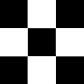

In [6]:
Image(filename="checkerboard_84x84.jpg")

# Read files using OpenCV

In [7]:
cb_image = cv2.imread("checkerboard_18x18.png", 0)
print(cb_image)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

# Display image attributes

In [8]:
print("Image size (H, W) is:", cb_image.shape)

print("Data type of image is:", cb_image.dtype)

Image size (H, W) is: (18, 18)
Data type of image is: uint8


# Display images in Matplotlib

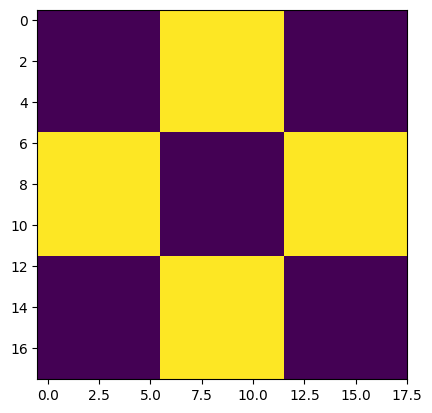

In [9]:
plt.imshow(cb_image)

# Show in grayscale

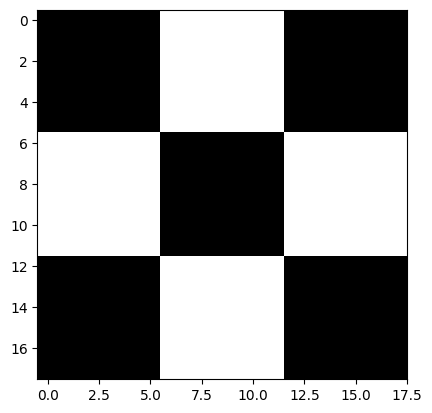

In [10]:
plt.imshow(cb_image, cmap="gray")

# Working with lossy formats

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

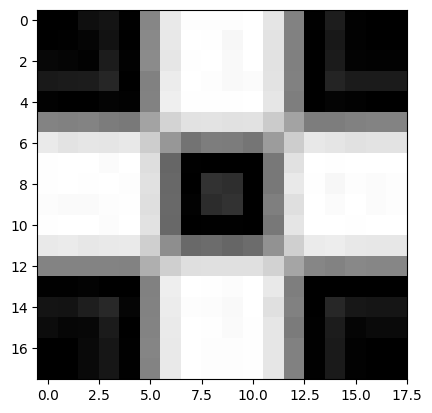

In [11]:
cb_image_fuzzy = cv.imread("checkerboard_fuzzy_18x18.jpg", 0)
print(cb_image_fuzzy)
plt.imshow(cb_image_fuzzy, cmap="gray")

# Read and display color images

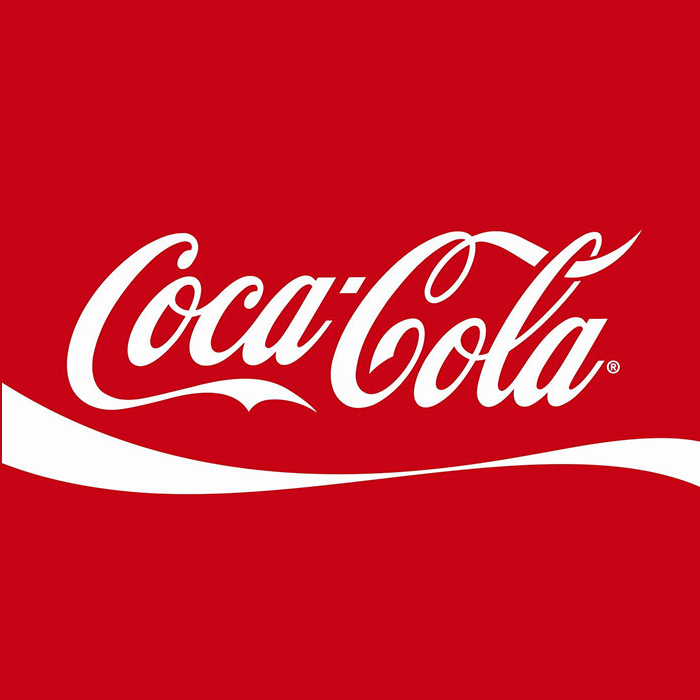

In [12]:
Image("coca-cola-logo.png")

In [13]:
coke_image = cv.imread("coca-cola-logo.png", 1)
print("Image size (H, W, C) is:", coke_image.shape)
print("Data type of image is:", coke_image.dtype)

Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


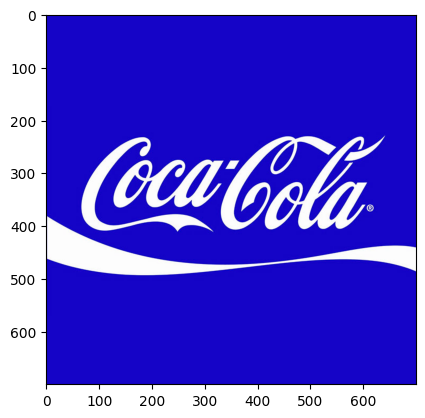

In [14]:
plt.imshow(coke_image)

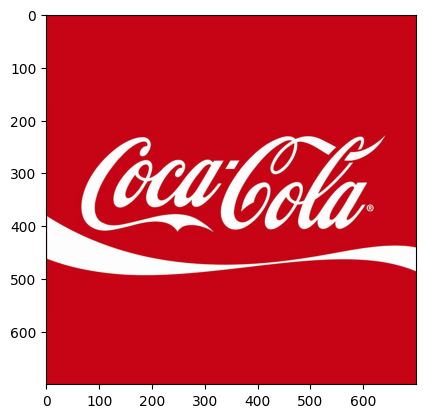

In [15]:
# Matplot lib expects images to be in RGB format but OpenCV stores images in BGR format.
coke_image_channels_reversed = coke_image[:, :, ::-1]
plt.imshow(coke_image_channels_reversed)

# Splitting and merging color channels

Text(0.5, 1.0, 'Merged Output')

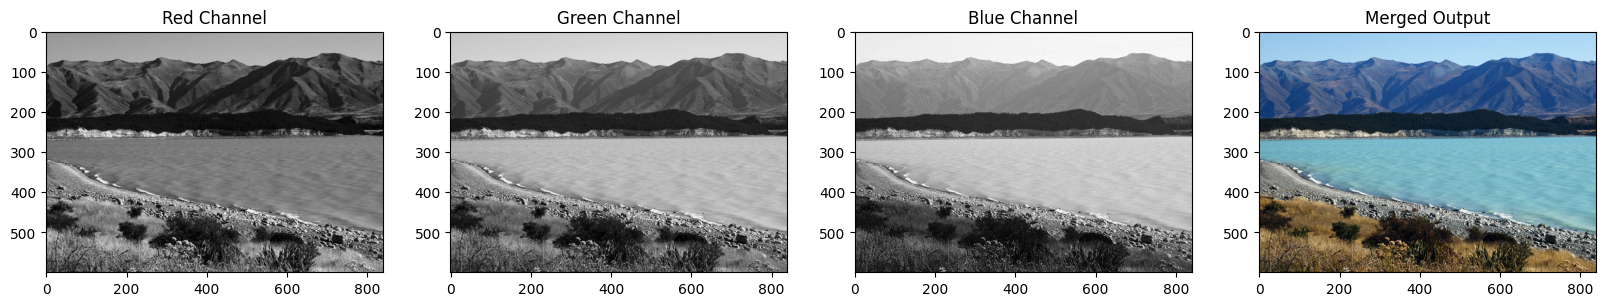

In [17]:
image_NZ_bgr = cv.imread("New_Zealand_Lake.jpg", cv.IMREAD_COLOR)
b, g, r = cv.split(image_NZ_bgr)

plt.figure(figsize=[20,5])

plt.subplot(141)
plt.imshow(r, cmap="gray")
plt.title("Red Channel")

plt.subplot(142)
plt.imshow(g, cmap="gray")
plt.title("Green Channel")

plt.subplot(143)
plt.imshow(b, cmap="gray")
plt.title("Blue Channel")

image_merged = cv.merge((b, g, r))
plt.subplot(144)
plt.imshow(image_merged[:, :, ::-1])
plt.title("Merged Output")

# Change to different color spaces

Text(0.5, 1.0, 'Original')

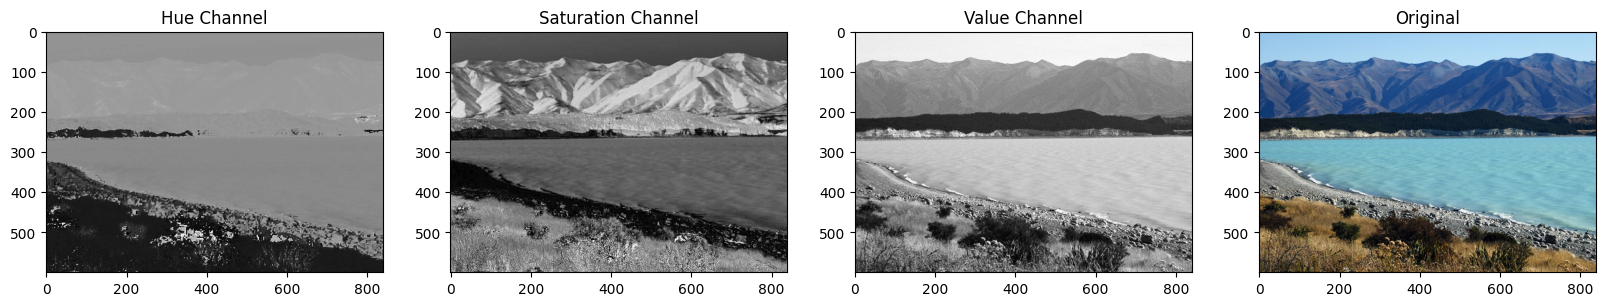

In [19]:
image_hsv = cv.cvtColor(image_NZ_bgr, cv.COLOR_BGR2HSV)
image_rgb = cv.cvtColor(image_NZ_bgr, cv.COLOR_BGR2RGB)

h, s, v = cv.split(image_hsv)

plt.figure(figsize=[20,5])

plt.subplot(141)
plt.imshow(h, cmap="gray")
plt.title("Hue Channel")

plt.subplot(142)
plt.imshow(s, cmap="gray")
plt.title("Saturation Channel")

plt.subplot(143)
plt.imshow(v, cmap="gray")
plt.title("Value Channel")

plt.subplot(144)
plt.imshow(image_rgb)
plt.title("Original")


# Modify individual channel

Text(0.5, 1.0, 'Modified')

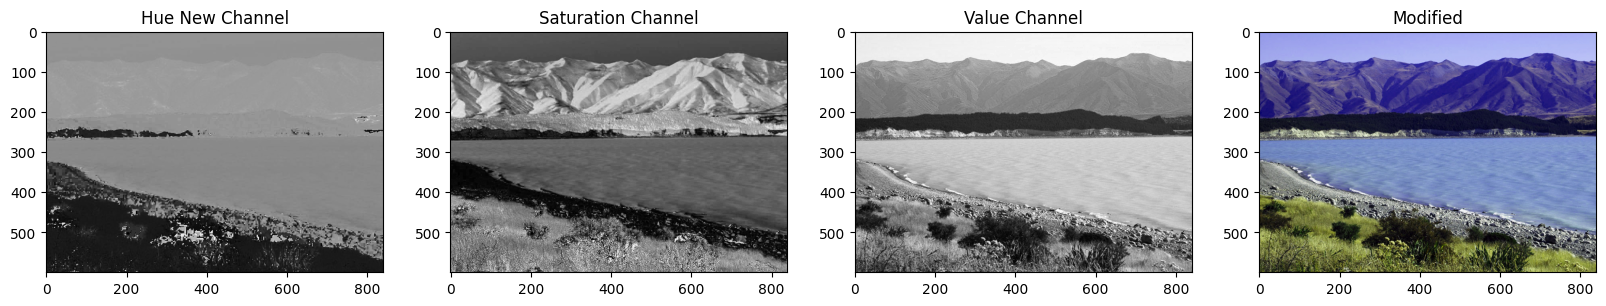

In [21]:
h_new = h + 15
image_NZ_merged = cv.merge((h_new, s, v))
image_NZ_rgb = cv.cvtColor(image_NZ_merged, cv.COLOR_HSV2RGB)

plt.figure(figsize=[20,5])

plt.subplot(141)
plt.imshow(h_new, cmap="gray")
plt.title("Hue New Channel")

plt.subplot(142)
plt.imshow(s, cmap="gray")
plt.title("Saturation Channel")

plt.subplot(143)
plt.imshow(v, cmap="gray")
plt.title("Value Channel")

plt.subplot(144)
plt.imshow(image_NZ_rgb)
plt.title("Modified")